4 6 3 6 3 6 6

- Wordcloud on keywords
- Cluster Groups

In [1]:
import pandas as pd
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words
import yake
import networkx as nx
from pyvis.network import Network

In [2]:
df = pd.read_excel('steam reviews.xlsx')
df.head()

Unnamed: 0                  Author  \
0           0                 Kaladin   
1           1                    KEVE   
2           2            ⛧ M♱ropele ⛧   
3           3  to infinity and beyond   
4           4      chelovek bez vkusa   

                                              Review  # of Comments  \
0  2 10 dollar battle passes per season\n\nTitanf...              0   
1  Now with the new battle pass system, I'm delet...             78   
2  At least you don't have to build an apartment ...             54   
3                       Finally I can remove Origin.              0   
4  Finally here\n\nIt launches without Origin...\...             35   

                  Products       Hours on Account           Remark  \
0  228 products in account      4.1 hrs on record  Not Recommended   
1   42 products in account  1,865.6 hrs on record  Not Recommended   
2  655 products in account      9.6 hrs on record      Recommended   
3  Few products in account      1.1 hrs on record      Recommended   
4  295 products in account     16.6 hrs on record      Recommended   

   Users found review funny  Users found review helpful  Community Awards  
0                       133                        3796               178  
1                        85                        4370               186  
2                      2017                        3089               500  
3                       634                        1770               103  
4                        91                        2109                49

In [3]:
df = df.drop('Unnamed: 0', axis = 1, errors = 'ignore')
df.head()

Author                                             Review  \
0                 Kaladin  2 10 dollar battle passes per season\n\nTitanf...   
1                    KEVE  Now with the new battle pass system, I'm delet...   
2            ⛧ M♱ropele ⛧  At least you don't have to build an apartment ...   
3  to infinity and beyond                       Finally I can remove Origin.   
4      chelovek bez vkusa  Finally here\n\nIt launches without Origin...\...   

   # of Comments                 Products       Hours on Account  \
0              0  228 products in account      4.1 hrs on record   
1             78   42 products in account  1,865.6 hrs on record   
2             54  655 products in account      9.6 hrs on record   
3              0  Few products in account      1.1 hrs on record   
4             35  295 products in account     16.6 hrs on record   

            Remark  Users found review funny  Users found review helpful  \
0  Not Recommended                       133                        3796   
1  Not Recommended                        85                        4370   
2      Recommended                      2017                        3089   
3      Recommended                       634                        1770   
4      Recommended                        91                        2109   

   Community Awards  
0               178  
1               186  
2               500  
3               103  
4                49

In [4]:
df_new = df.copy()

In [5]:
df_new['Products'] = (
    df.Products.str.replace(r'\D','', regex = True)
    .map(lambda x: 0 if x == '' else x)
    .astype(int)
)
df_new['Hours on Account'] = (
    df['Hours on Account'].str.replace(r'\D','',regex=True)
    .map(lambda x: 0 if x == '' else x)
    .astype(int)
)

df_new.head()

Author                                             Review  \
0                 Kaladin  2 10 dollar battle passes per season\n\nTitanf...   
1                    KEVE  Now with the new battle pass system, I'm delet...   
2            ⛧ M♱ropele ⛧  At least you don't have to build an apartment ...   
3  to infinity and beyond                       Finally I can remove Origin.   
4      chelovek bez vkusa  Finally here\n\nIt launches without Origin...\...   

   # of Comments  Products  Hours on Account           Remark  \
0              0       228                41  Not Recommended   
1             78        42             18656  Not Recommended   
2             54       655                96      Recommended   
3              0         0                11      Recommended   
4             35       295               166      Recommended   

   Users found review funny  Users found review helpful  Community Awards  
0                       133                        3796               178  
1                        85                        4370               186  
2                      2017                        3089               500  
3                       634                        1770               103  
4                        91                        2109                49

In [6]:
df_new['Remark'].unique()

array(['Not Recommended', 'Recommended'], dtype=object)

In [7]:
df_new['Remark'] = df_new.Remark.map({'Not Recommended':0,'Recommended':1})
df_new = df_new.rename({'Remark':'isRecommended'}, axis = 1)
df_new

Author  \
0                   Kaladin   
1                      KEVE   
2              ⛧ M♱ropele ⛧   
3    to infinity and beyond   
4        chelovek bez vkusa   
..                      ...   
995          Mayano Top Gun   
996                  Dubinn   
997                   Fiery   
998                 ZenTrix   
999                    BOOF   

                                                Review  # of Comments  \
0    2 10 dollar battle passes per season\n\nTitanf...              0   
1    Now with the new battle pass system, I'm delet...             78   
2    At least you don't have to build an apartment ...             54   
3                         Finally I can remove Origin.              0   
4    Finally here\n\nIt launches without Origin...\...             35   
..                                                 ...            ...   
995                                       GAME NGENTOD              0   
996  Used to love it, now look at what they did to ...              0   
997  You removed linux support? AI cheats basically...              0   
998  You accidentally fall off a cliff while trying...              0   
999  This game gave me:\n\n· Acne\n· AIDS\n· Allerg...              0   

     Products  Hours on Account  isRecommended  Users found review funny  \
0         228                41              0                       133   
1          42             18656              0                        85   
2         655                96              1                      2017   
3           0                11              1                       634   
4         295               166              1                        91   
..        ...               ...            ...                       ...   
995        74              8195              0                         1   
996       347              1057              0                         0   
997         0                18              0                         0   
998       162              3316              1                         0   
999         0                23              0                        13   

     Users found review helpful  Community Awards  
0                          3796               178  
1                          4370               186  
2                          3089               500  
3                          1770               103  
4                          2109                49  
..                          ...               ...  
995                          14                 0  
996                          11                 0  
997                          24                 0  
998                           7                 1  
999                          10                 0  

[1000 rows x 9 columns]

In [8]:
df_new.describe()

# of Comments      Products  Hours on Account  isRecommended  \
count    1000.000000   1000.000000       1000.000000    1000.000000   
mean        4.170000    238.503000       8478.611000       0.558000   
std        16.599537    844.863574      16197.627037       0.496873   
min         0.000000      0.000000          1.000000       0.000000   
25%         0.000000      0.000000        644.500000       0.000000   
50%         0.000000     45.000000       3609.500000       1.000000   
75%         3.000000    205.000000      10376.250000       1.000000   
max       434.000000  16131.000000     241730.000000       1.000000   

       Users found review funny  Users found review helpful  Community Awards  
count               1000.000000                 1000.000000       1000.000000  
mean                  50.336000                  209.777000         17.629000  
std                  135.558457                  400.198041         42.173332  
min                    0.000000                    0.000000          0.000000  
25%                    2.000000                   25.000000          1.000000  
50%                   10.000000                   79.000000          5.000000  
75%                   45.250000                  233.500000         16.000000  
max                 2017.000000                 6142.000000        517.000000

<Axes: >

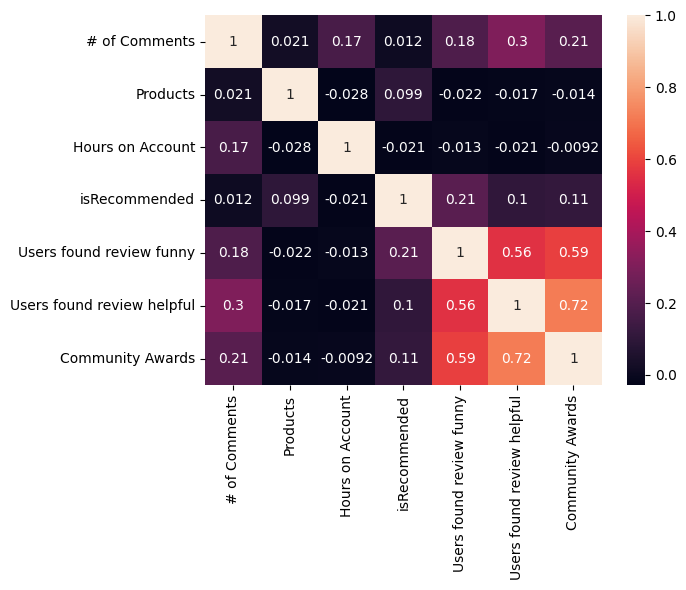

In [9]:
sns.heatmap(df_new.corr(numeric_only=True), annot = True)

# Wordcloud

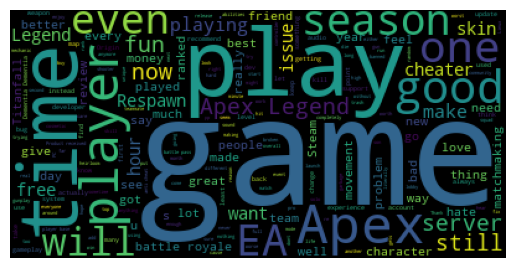

In [10]:
all_reviews = ' '.join(df_new['Review'].str.replace('\n',' ').tolist())

wordcloud = WordCloud().generate_from_text(all_reviews)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [11]:
# Function to make generation easier
def generate_wordcloud(text: str, min_word_length: int = 0) -> None:
    wordcloud = WordCloud(min_word_length=min_word_length).generate_from_text(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return

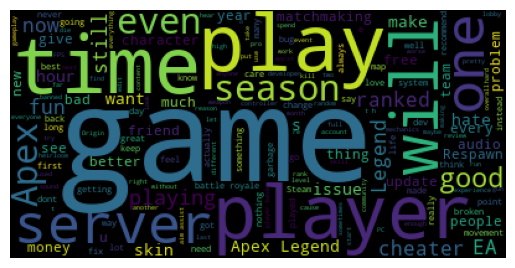

In [12]:
high_hour_reviews = ' '.join(
    df_new[df_new['Hours on Account'] > df_new['Hours on Account'].mean()]['Review']
    .str.replace('\n', ' ').tolist()
    )

generate_wordcloud(high_hour_reviews)

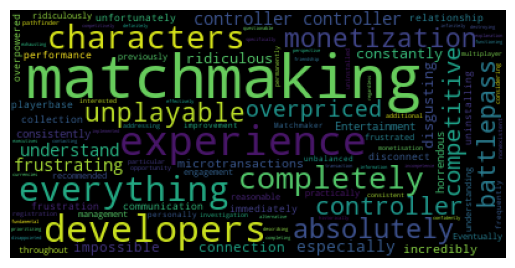

In [13]:
negative_reviews = ' '.join(
    df_new[df_new['isRecommended'] == 0]['Review']
    .str.replace('\n',' ').tolist()
)

# Changing the min_word_length argument filters out some of the common words
generate_wordcloud(negative_reviews, 10)

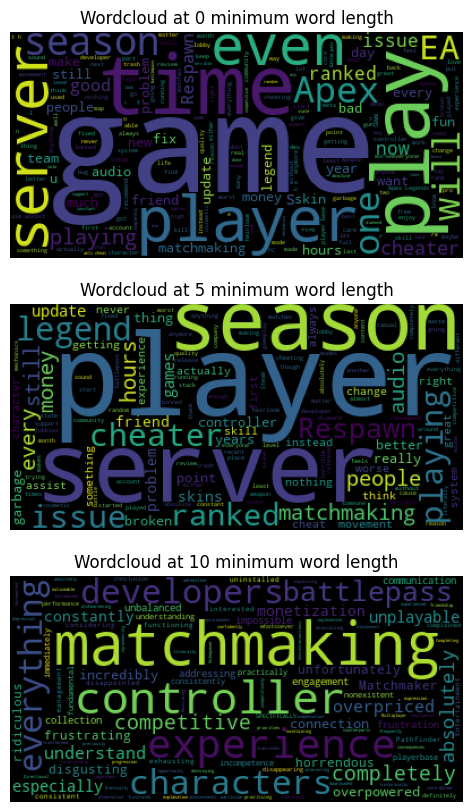

In [14]:
# Generate wordcloud plots in intervals of 5 from 0 to 10
high_hour_negative_reviews = ' '.join(
    df_new[(df_new['Hours on Account'] > df_new['Hours on Account'].mean()) & (df_new['isRecommended'] == 0)]['Review']
    .str.replace('\n',' ').tolist()
)
fig, axs = plt.subplots(3, 1, figsize = (12,10))

for i,v in enumerate([0, 5, 10]):
    wordcloud = WordCloud(min_word_length = v).generate_from_text(high_hour_negative_reviews)
    axs[i].imshow(wordcloud)
    axs[i].set_axis_off()
    axs[i].set_title(f'Wordcloud at {v} minimum word length')

In [15]:
def generate_all_wordclouds(texts: str, start: int = 0, end: int = 10, step: int = 5, 
                            figsize: tuple[int,int] = (15,12)) -> None:
    num_plots = (end - start)//step + 1
    intervals = [i for i in range(start, end + 1, step)]    
    fig, axs = plt.subplots(num_plots, 1, figsize = figsize)
    
    for i,v in enumerate(intervals):
        wordcloud = WordCloud(min_word_length = v).generate_from_text(texts)
        axs[i].imshow(wordcloud)
        axs[i].set_axis_off()
        axs[i].set_title(f'Wordcloud at {v} minimum word length')
        
    return

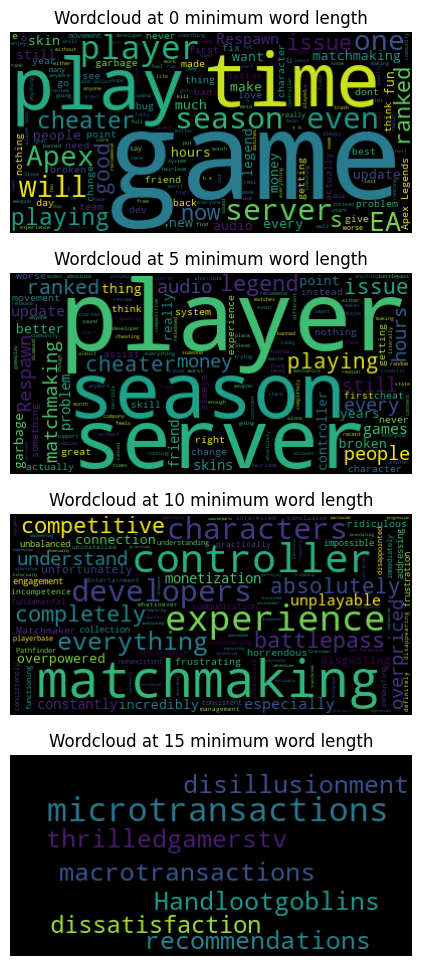

In [16]:
generate_all_wordclouds(high_hour_negative_reviews, end = 15)

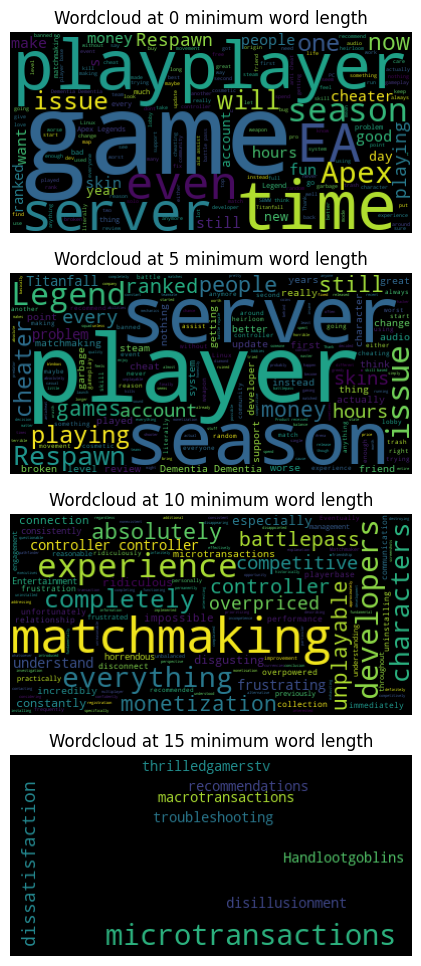

In [17]:
generate_all_wordclouds(negative_reviews, end = 15)

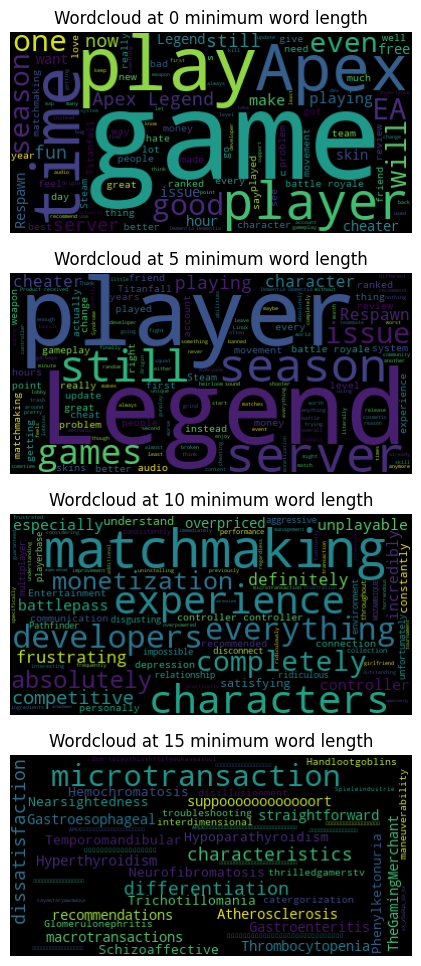

In [18]:
generate_all_wordclouds(all_reviews, end = 15)

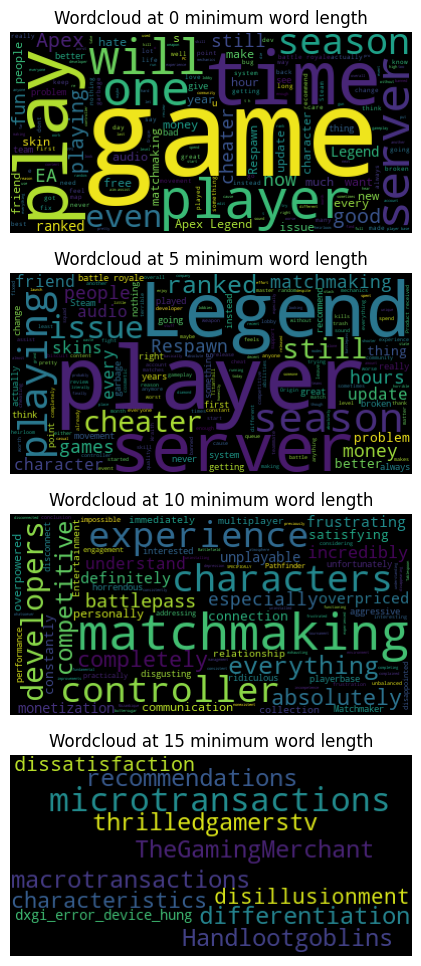

In [19]:
generate_all_wordclouds(high_hour_reviews, end = 15)

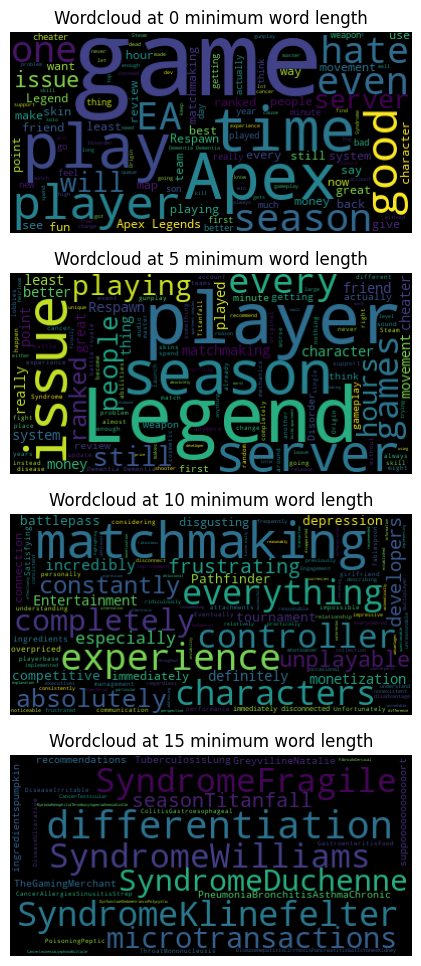

In [20]:
# Filter by helpful
helpful_df = df_new[df_new['Users found review helpful'] > df_new['Users found review helpful'].mean()]

helpful = ' '.join(helpful_df['Review'].str.replace('\n','').tolist())

generate_all_wordclouds(helpful, end = 15)

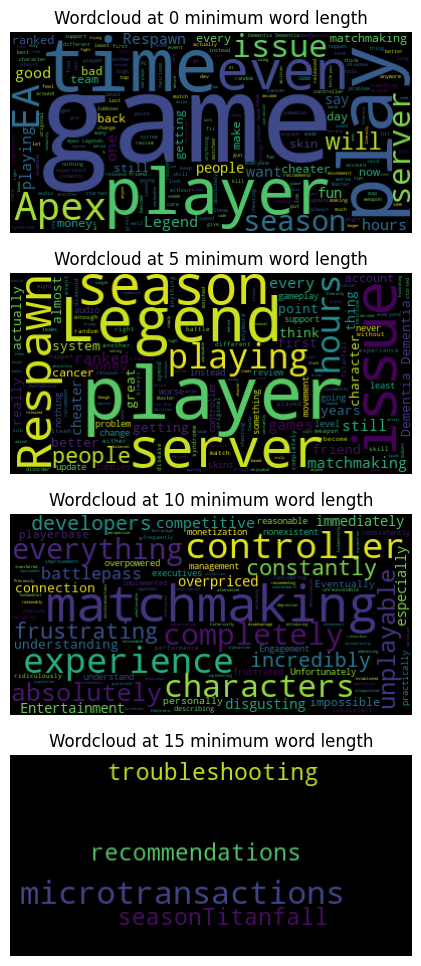

In [21]:
helpful_negative = ' '.join(helpful_df[helpful_df['isRecommended'] == 0]['Review'].str.replace('\n','').tolist())

generate_all_wordclouds(helpful_negative, end = 15)

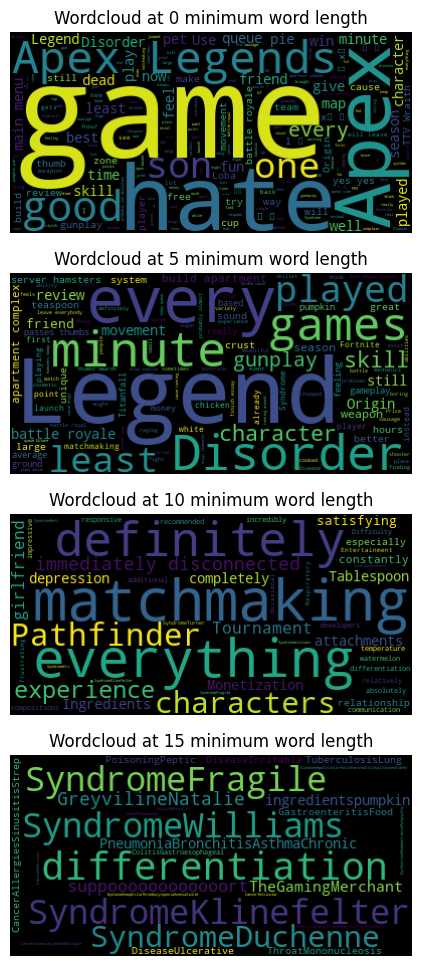

In [22]:
helpful_positive = ' '.join(helpful_df[helpful_df['isRecommended'] == 1]['Review'].str.replace('\n','').tolist())

generate_all_wordclouds(helpful_positive, end = 15)

# Topic Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [24]:
documents = df_new['Review'].str.replace('\n','').tolist()

tfid = TfidfVectorizer(stop_words = 'english')
document_X = tfid.fit_transform(documents)

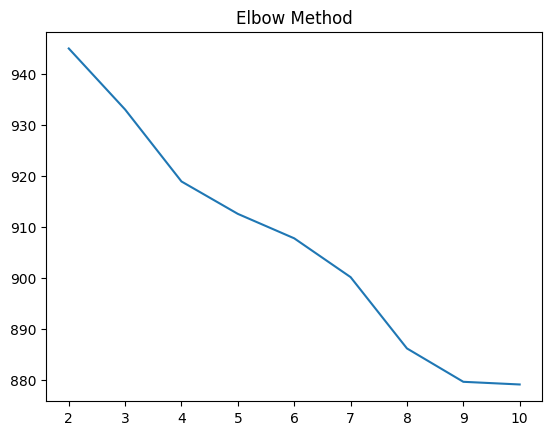

In [25]:
inertias = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 10)
    model = kmeans.fit(document_X)
    inertias.append(model.inertia_)
    
plt.plot(range(2,11), inertias)
plt.title('Elbow Method')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 6, random_state = 0, n_init = 10)
model = kmeans.fit(document_X)

In [27]:
features = tfid.get_feature_names_out()
features

array(['00', '000', '000art', ..., '𝙪𝙨𝙚𝙙', '𝙬𝙖𝙮', '𝙬𝙞𝙩𝙝'], dtype=object)

In [28]:
model.cluster_centers_[0].argsort()[::-1]

array([7255, 1438,  508, ..., 5233, 5234,    0], dtype=int64)

In [29]:
features[1438]

'complex'

In [30]:
for i in range(6):
    print(f'Topic {i}')
    tfid_vector = model.cluster_centers_[i].argsort()[::-1]
    top_words = [features[vector] for vector in tfid_vector][:100]
    print(top_words)

Topic 0
['win', 'complex', 'apartment', 'build', 'don', 'apex', 'architect', 'need', 'fun', 'octane', 'legend', 'best', 'finally', 'final', 'filter', 'filthy', 'finances', 'filling', 'filled', 'files', 'filedetails', 'finals', 'finely', 'financial', 'finding', 'fine', 'figured', 'finest', 'finger', 'fingers', 'finish', 'finished', 'finishers', 'fireball', 'fired', 'firewalls', 'fireworks', 'filed', '𝙬𝙞𝙩𝙝', 'figure', 'fiasco', 'female', 'females', 'fence', 'fences5', 'fenugreek3', 'fest', 'fever', 'fevercholerarabiesebola', 'feverrheumatoid', 'feverzika', 'ff7', 'fi', 'fibroids', 'fights', 'fibroidscervical', 'fibromyalgia', 'fibrosis', 'fibrosisphenylketonuria', 'fictional', 'fid', 'fiends', 'fiesta', 'fifth', 'fight', 'fighting', 'firmly', 'firing', 'fit', 'fish', 'flinging', 'flipbook', 'flipped', 'floating', 'flooded', 'floor', 'flop', 'flour', 'flour3', 'flowing', 'flu', 'fluent', 'fluid', 'fluidity', 'fly', 'flying', 'focal', 'focus', 'focused', 'focuses', 'focusing', 'foil', 'foi

In [31]:
stop_words = (get_stop_words('en') 
              + # Adding additional stop words to avoid inconsistency user warning
              ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan', 'vis'])

In [32]:
def extract_topics(text_col: pd.Series, getModel: bool = False, stop_words: list[str] = stop_words) -> KMeans:
    document = text_col.str.replace('\n',' ').str.replace(r'[^a-zA-Z\s0-9]','', regex = True).tolist()
    
    print('==='*12, end = '\n\n')
    print('Initializing Model...\n')
    tfid = TfidfVectorizer(stop_words = stop_words)
    X = tfid.fit_transform(document)
    
    print('==='*12, end = '\n\n')
    print('Inertia Graph for Optimal Cluster Selection\n')
    inertias = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 10)
        model = kmeans.fit(X)
        inertias.append(model.inertia_)
        
    plt.plot(range(2,11), inertias)
    plt.title('Elbow Method')
    plt.show()
    
    print('Graph Plotted. Please Analyze and Choose a cluster number based on graph.\n')
    k = input('Specify number of clusters for model: ')
    
    while not k.isnumeric():
        k = input('Specify number of clusters for model: ')
    
    k = int(k)
    
    print('==='*12, end = '\n\n')
    print('Creating Model...\n')
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 10)
    model = kmeans.fit(X)
    
    print('==='*12, end = '\n\n')
    print('Extracted Topics: \n')
    features = tfid.get_feature_names_out()
    for i in range(k):
        print(f'Topic {i}')
        tfid_vector = model.cluster_centers_[i].argsort()[::-1]
        top_words = [features[vector] for vector in tfid_vector][:100]
        print(top_words)
    print('==='*12)
    
    return model if getModel else None


Initializing Model...


Inertia Graph for Optimal Cluster Selection



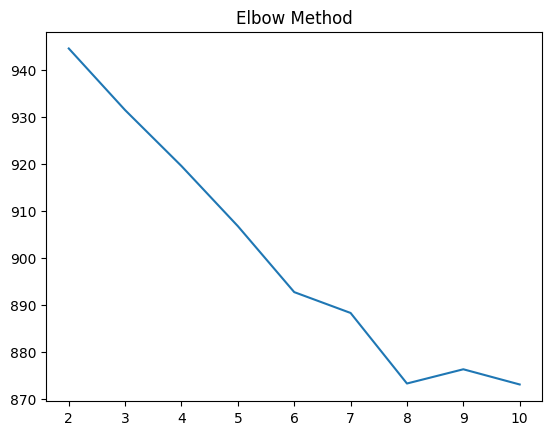

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['titanfall', 'ea', 'linux', 'died', 'legends', 'origin', 'pet', 'sex', 'thumbs', 'loba', 'cat', 'fortnite', 'leave', 'battle', 'play', 'review', 'royale', 'lobas', 'apex', 'mozambique', 'servers', 'ass', 'ape', 'games', 'passes', 'steam', 'game', 'support', 'awards', 'respawn', 'bring', 'removed', 'time', 'finally', 'add', 'duos', 'cheaters', 'friends', 'apesex', 'party', 'kill', 'trash', 'fun', '1010', 'bad', 'gibbys', 'players', 'die', 'recommend', 'bruda', 'remove', 'gender', 'read', 'neutral', 'gay', 'deck', 'hours', 'anticheat', 'day', 'assist', 'pass', 'christs', 'matchmaking', 'balls', 'audio', 'love', 'pretty', 'aim', 'retarded', 'banned', 'trust', 'piece', 'arenas', 'skins', 'launch', 'uninstall', 'garbage', 'warzone', 'hard', 'killed', 'money', 'pathfinder', 'legend', 'cool', 'cancer', 'gameplay', 'played', 'minutes', 'company', 'sanity', 'attracted', '

In [33]:
extract_topics(df_new['Review'])

In [34]:
positive_highs= df_new[
 (df_new['isRecommended'] == 1) &
 (df_new['Hours on Account'] > df_new['Hours on Account'].mean()) &
 (df_new['Users found review helpful'] > df_new['Users found review helpful'].mean())
]['Review']

positive_lows = df_new[
 (df_new['isRecommended'] == 1) &
 (df_new['Hours on Account'] < df_new['Hours on Account'].mean()) &
 (df_new['Users found review helpful'] > df_new['Users found review helpful'].mean())
]['Review']

negative_highs = df_new[
 (df_new['isRecommended'] == 0) &
 (df_new['Hours on Account'] > df_new['Hours on Account'].mean()) &
 (df_new['Users found review helpful'] > df_new['Users found review helpful'].mean())
]['Review']

negative_lows = df_new[
 (df_new['isRecommended'] == 0) &
 (df_new['Hours on Account'] < df_new['Hours on Account'].mean()) &
 (df_new['Users found review helpful'] > df_new['Users found review helpful'].mean())
]['Review']

all_positive = df_new[df_new['isRecommended'] == 1]['Review']
all_negative = df_new[df_new['isRecommended'] == 0]['Review']


Initializing Model...


Inertia Graph for Optimal Cluster Selection



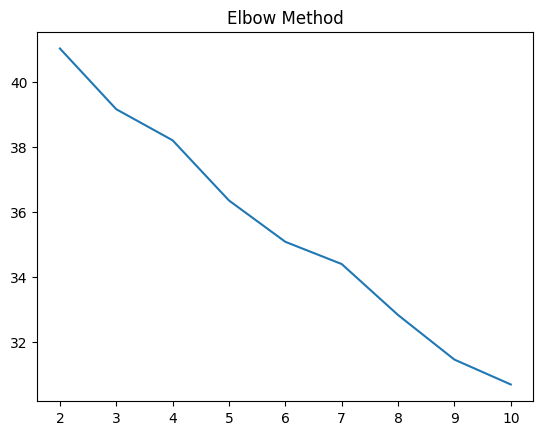

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['minutes', 'raging', 'wraith', 'recommend', 'caustic', 'erections', 'bipolar', 'breakdown', 'anxiety', 'relationships', 'racism', 'disorder', 'mood', 'swings', 'ttv', '1010', 'waiting', 'game', 'main', 'squad', 'menu', 'queue', 'worth', 'spider', 'looting', '5960', 'wall', 'joined', 'waited', '15', 'dropped', 'players', 'bald', 'guy', 'spent', 'match', 'die', 'sniper', 'shotgun', 'hiding', 'camper', 'traditional', 'git', 'bullet', 'aggressive', 'killed', 'gud', 'kid', 'battlefield', 'building', 'rng', 'rewards', 'focused', '1000m', 'gap', 'hit', 'unfair', 'pubg', 'friendly', 'parkour', 'difference', 'movementbased', 'discourages', 'disliked', 'pick', 'hamsters', 'zone', 'camping', 'playstyle', 'putting', 'sweaty', 'skill', 'games', 'single', 'respawn', 'server', 'time', 'apex', 'killing', 'clutch', 'juiced', 'octane', 'leave', 'jumped', 'collect', 'traps', 'code'

In [35]:
extract_topics(positive_highs)


Initializing Model...


Inertia Graph for Optimal Cluster Selection



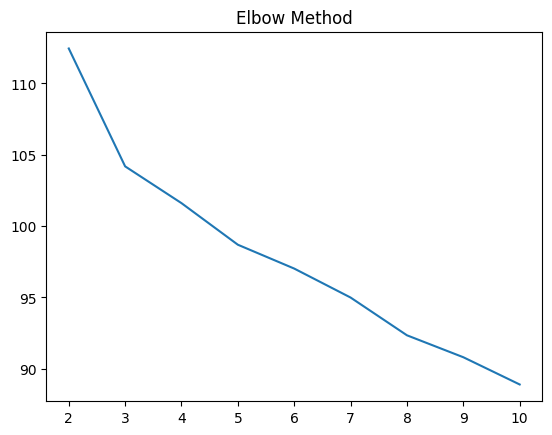

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['pet', 'thumbs', 'cat', 'leave', 'passes', 'awards', 'friends', 'pass', 'rampart', 'passing', 'capybara', 'beautiful', 'steam', 'fantastic', 'fantasies', 'expert', 'explosive', 'extending', 'extensively', 'extremely', 'f2p', 'facet', 'failure', 'fair', 'fall', 'entry', 'enjoyable', 'enjoy', 'false', 'enhance', 'farm', 'engine', 'fanservice', 'fallen', 'entertainment', 'experience', 'expense', 'enuresis', 'eosinophilic', 'epic', 'epilepsy', 'erectile', 'erections', 'erotic', 'esophagitis', 'esophagus', 'essay', 'evaporated', 'events', 'evolved', 'excellent', 'exception', 'ensure', 'enjoyment', 'excoriation', 'farmer', 'exist', 'expect', 'experiences', 'zone', 'fasciitis', 'finally', 'finely', 'finish', 'fireball', 'firewalls', 'fit', 'flair', 'flaked', 'flaky', 'flawed', 'flaxen', 'flu', 'fluid', 'flying', 'focal', 'foil', 'fold', 'follow', 'food', 'fooled', 'foot

In [36]:
extract_topics(positive_lows)


Initializing Model...


Inertia Graph for Optimal Cluster Selection



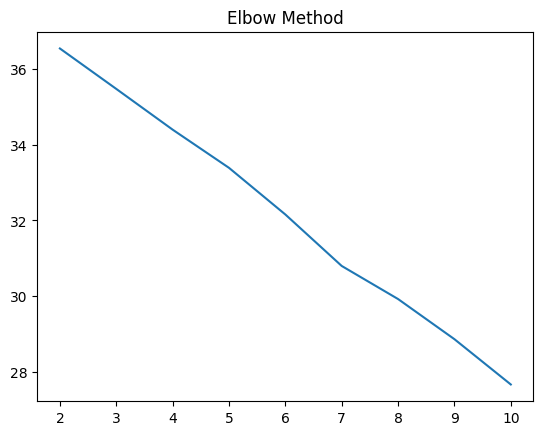

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['trust', 'trash', 'server', 'recommend', 'legends', 'gibbys', 'gender', 'bruda', 'neutral', 'gunplay', 'servers', 'balancing', 'monetization', 'movement', 'hard', 'stuff', 'game', 'terrible', 'developers', 'frustrating', 'fun', 'apex', 'players', 'hours', 'games', 'flaming', 'znce', 'lazy', 'asf', 'suicidal', 'inconsistent', 'unbalanced', '1k', '15', 'fake', 'invest', 'nuked', 'earespawns', 'violated', 'ban', 'slap', 'cheated', 'transparency', 'details', 'treated', 'email', 'customer', 'appealing', 'accountability', 'generic', 'loyalty', 'spent', 'unacceptable', 'resolved', 'enjoyed', 'guarantee', 'product', 'promises', 'mechanics', 'mess', 'expensive', 'deserves', 'marvel', 'lottery', 'london', 'novices', 'royal', 'prodigies', 'rude', 'mute', 'extortion', 'monstrously', 'modern', 'crashes', 'loud', 'sold', 'pitting', 'entertainment', 'socalled', 'mercy', 'logic'

In [37]:
extract_topics(negative_highs)


Initializing Model...


Inertia Graph for Optimal Cluster Selection



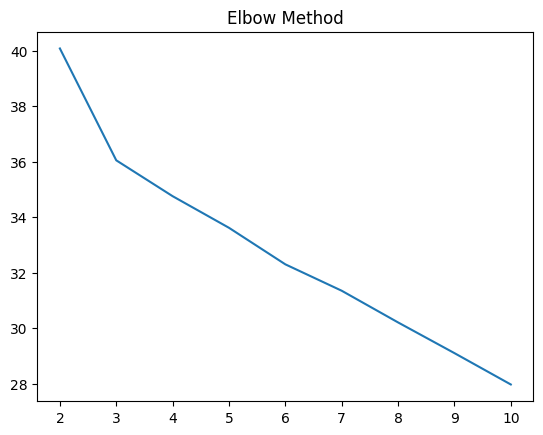

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['game', 'apex', 'play', 'ea', 'season', 'servers', 'playing', 'trash', 'skins', 'players', 'respawn', 'legends', 'issues', 'matchmaking', 'people', 'bikini', 'fun', 'unplayable', 'bad', 'hours', 'time', 'update', 'review', 'money', 'day', 'level', 'games', 'account', 'crashing', 'tournament', 'streamer', 'support', 'decided', 'steam', 'read', 'dementia', 'lobbies', 'spend', 'started', 'hit', 'literally', 'pls', 'china', 'region', 'lock', 'snort', 'cocaine', 'skill', 'love', 'session', 'diamond', 'cheaters', 'issue', 'match', 'gameplay', 'crashed', 'gaming', 'devs', 'player', 'freezes', 'removed', 'played', 'ranked', 'cancer', 'supposed', 'fine', 'unhealthiest', 'involved', 'communities', 'addicting', 'legend', 'pass', 'completely', 'pc', 'gain', 'sad', 'predators', 'friends', 'petty', 'penalty', 'minute', 'abandon', 'heirloom', 'based', '100x', 'weapon', 'solo', 

In [38]:
extract_topics(negative_lows)


Initializing Model...


Inertia Graph for Optimal Cluster Selection



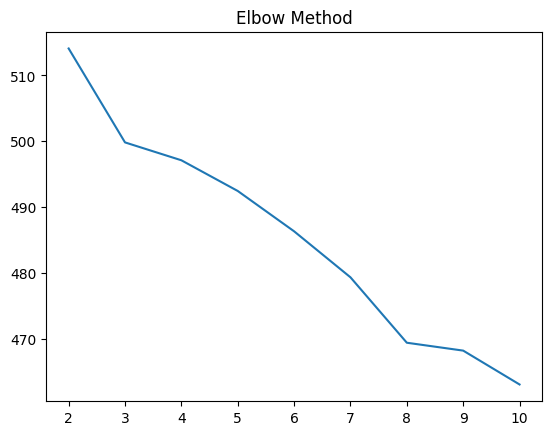

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['solo', 'mode', 'game', 'players', 'friends', 'squads', 'egg', 'personally', 'royales', 'battle', 'newbie', 'eggs', 'components', 'hard', 'gods', 'unrealistic', 'tons', 'apex', 'communication', 'shooter', 'team', '2021', 'saint', 'smash', 'pinging', 'developed', 'tightest', 'opportunity', 'randomness', 'patience', 'imo', 'helps', 'sucks', 'runs', 'randoms', 'royal', 'games', 'offers', 'absolutely', 'squad', 'queue', 'graphics', 'pc', 'mechanics', 'catering', 'expense', 'overshadowed', 'practices', 'gameplays', 'renovate', 'nailed', 'genere', 'managed', 'enjoyment', 'legends', 'greedy', 'eas', 'gameplay', 'app', 'metas', 'messyknow', 'succeed', 'communicate', 'aspects', 'core', 'lack', 'mess', '3k', 'royale', 'misclick', '6060', 'shoots', '19', 'simultaneously', 'pepehappy', '20th', 'playing', 'time', 'odd', 'curve', 'changing', 'monetization', 'accidentally', 'lo

In [39]:
extract_topics(all_positive)


Initializing Model...


Inertia Graph for Optimal Cluster Selection



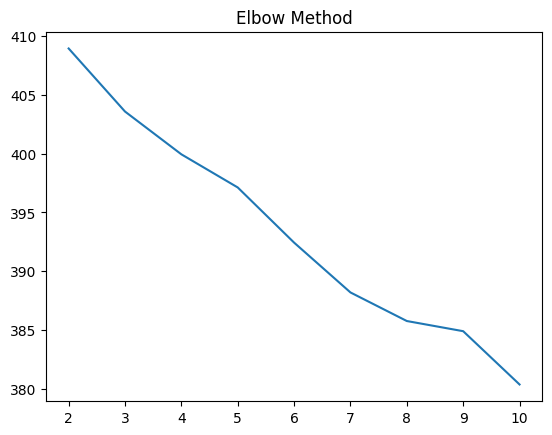

Graph Plotted. Please Analyze and Choose a cluster number based on graph.


Creating Model...


Extracted Topics: 

Topic 0
['game', 'servers', 'play', 'players', 'apex', 'time', 'people', 'matchmaking', 'season', 'playing', 'legends', 'money', 'fun', 'hours', 'cheaters', 'bad', 'respawn', 'games', 'ranked', 'player', 'ea', 'issues', 'terrible', 'aim', 'battle', 'product', 'update', 'received', 'skins', 'played', 'assist', 'level', 'banned', 'controller', 'developers', 'pass', 'worst', 'recommend', 'skill', 'devs', 'day', 'audio', 'friends', 'match', 'love', 'broken', 'worse', 'literally', 'bugs', 'issue', 'server', 'steam', 'garbage', 'care', 'casual', 'crashing', 'base', 'sucks', 'kills', 'real', 'cancer', '20', 'cosmetics', 'running', 'pc', 'spend', 'lot', 'greed', 'movement', 'unplayable', 'fixed', 'started', 'based', 'start', 'reason', 'mode', 'experience', 'gameplay', 'team', 'ruined', 'times', 'account', 'sbmm', 'horrible', 'support', 'seasons', 'absolutely', 'months', 'change',

In [40]:
extract_topics(all_negative)

In [41]:
yake_kw = yake.KeywordExtractor()

In [42]:
df_new['Review'][0]

'2 10 dollar battle passes per season\n\nTitanfall died for this slop'

In [43]:
keywords = yake_kw.extract_keywords(df_new['Review'][10])

print(*keywords[:5], sep = '\n')

('Time to uninstall', 0.04940384002065631)
('uninstall origin', 0.04940384002065631)
('Time', 0.15831692877998726)
('origin', 0.15831692877998726)
('uninstall', 0.29736558256021506)


In [44]:
[k[0] for k in keywords[:5]]

['Time to uninstall', 'uninstall origin', 'Time', 'origin', 'uninstall']

In [45]:
def get_keywords(text: str, top_n: int = 5) -> list[str]:
    kwscores = yake_kw.extract_keywords(text)[:top_n]
    
    keywords = [kw[0] for kw in kwscores]
    keywords = [s.lower() for s in keywords]
    
    return keywords

In [46]:
df_new['Review'].map(lambda x: get_keywords(x))

0      [season titanfall died, dollar battle passes, ...
1      [battle pass system, pass system, deleting the...
2      [win in apex, build an apartment, apartment co...
3               [remove origin, origin, finally, remove]
4      [launches without origin, origin, respawn, fin...
                             ...                        
995                        [game ngentod, game, ngentod]
996    [love, needed to release, malware than respawn...
997    [removed linux support, linux support, removed...
998    [evade enemy fire, enemy fire, accidentally fa...
999    [chronic fatigue syndrome, foreign accent synd...
Name: Review, Length: 1000, dtype: object

In [47]:
df_new['keywords'] = df_new['Review'].map(lambda x: get_keywords(x))

df_new.head()

Author                                             Review  \
0                 Kaladin  2 10 dollar battle passes per season\n\nTitanf...   
1                    KEVE  Now with the new battle pass system, I'm delet...   
2            ⛧ M♱ropele ⛧  At least you don't have to build an apartment ...   
3  to infinity and beyond                       Finally I can remove Origin.   
4      chelovek bez vkusa  Finally here\n\nIt launches without Origin...\...   

   # of Comments  Products  Hours on Account  isRecommended  \
0              0       228                41              0   
1             78        42             18656              0   
2             54       655                96              1   
3              0         0                11              1   
4             35       295               166              1   

   Users found review funny  Users found review helpful  Community Awards  \
0                       133                        3796               178   
1                        85                        4370               186   
2                      2017                        3089               500   
3                       634                        1770               103   
4                        91                        2109                49   

                                            keywords  
0  [season titanfall died, dollar battle passes, ...  
1  [battle pass system, pass system, deleting the...  
2  [win in apex, build an apartment, apartment co...  
3           [remove origin, origin, finally, remove]  
4  [launches without origin, origin, respawn, fin...

In [48]:
df_new['keywords']

0      [season titanfall died, dollar battle passes, ...
1      [battle pass system, pass system, deleting the...
2      [win in apex, build an apartment, apartment co...
3               [remove origin, origin, finally, remove]
4      [launches without origin, origin, respawn, fin...
                             ...                        
995                        [game ngentod, game, ngentod]
996    [love, needed to release, malware than respawn...
997    [removed linux support, linux support, removed...
998    [evade enemy fire, enemy fire, accidentally fa...
999    [chronic fatigue syndrome, foreign accent synd...
Name: keywords, Length: 1000, dtype: object

In [49]:
df_new['keywords'][0]

['season titanfall died',
 'dollar battle passes',
 'season titanfall',
 'titanfall died',
 'dollar battle']

# Visualization

In [71]:
box_df = df_new[['Hours on Account','isRecommended']]
box_df['isRecommended'] = box_df['isRecommended'].map({0:'Not Recommended',1:'Recommended'})
box_df

C:\Users\kayle\AppData\Local\Temp\ipykernel_5836\2460888280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df['isRecommended'] = box_df['isRecommended'].map({0:'Not Recommended',1:'Recommended'})


Hours on Account    isRecommended
0                  41  Not Recommended
1               18656  Not Recommended
2                  96      Recommended
3                  11      Recommended
4                 166      Recommended
..                ...              ...
995              8195  Not Recommended
996              1057  Not Recommended
997                18  Not Recommended
998              3316      Recommended
999                23  Not Recommended

[1000 rows x 2 columns]

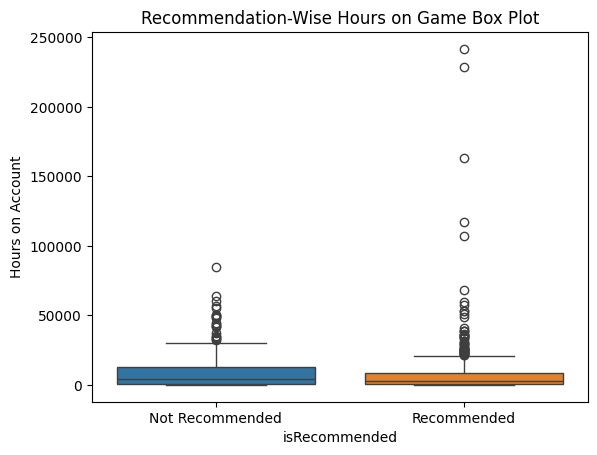

In [73]:
sns.boxplot(data = box_df, x = 'isRecommended', y = 'Hours on Account', hue = 'isRecommended')
plt.title('Recommendation-Wise Hours on Game Box Plot')
plt.show()

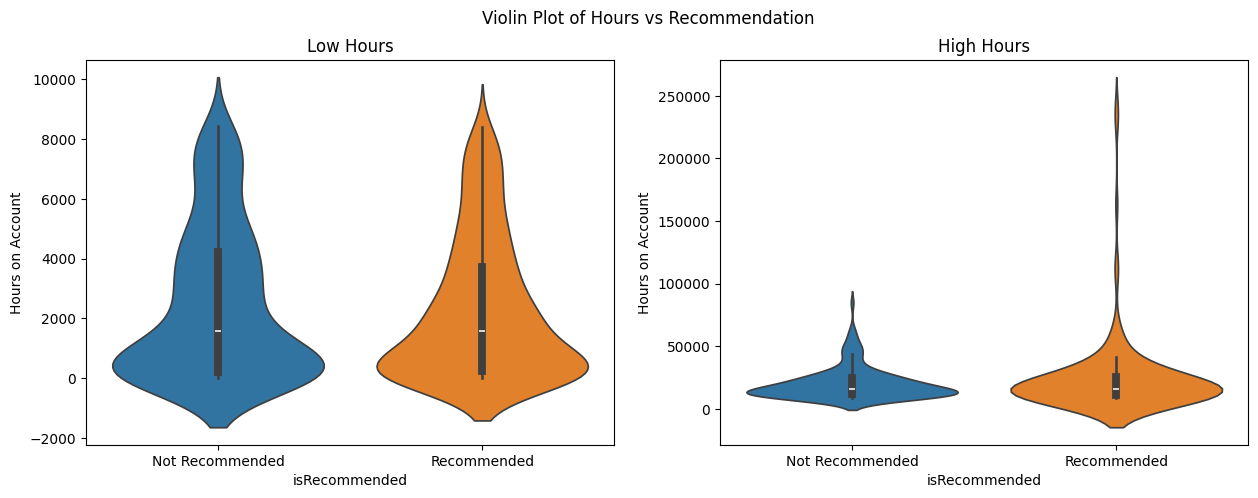

In [127]:
high_hours_df = box_df[box_df['Hours on Account'] > box_df['Hours on Account'].mean()]
low_hours_df = box_df[box_df['Hours on Account'] <= box_df['Hours on Account'].mean()]

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

fig.suptitle('Violin Plot of Hours vs Recommendation')

sns.violinplot(low_hours_df[['Hours on Account','isRecommended']], x = 'isRecommended', y = 'Hours on Account', hue = 'isRecommended', ax = axs[0])
axs[0].set_title('Low Hours')

sns.violinplot(high_hours_df[['Hours on Account','isRecommended']], x = 'isRecommended', y = 'Hours on Account', hue = 'isRecommended', ax = axs[1])
axs[1].set_title('High Hours')

plt.show()

# I wanna see if the hours on the game affects whether the player would recommend it or not?

# Violin plot
# Left: Low Hours
# Right: High Hours